In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('ssq.csv',encoding='utf-8')

In [3]:
print(data)

           期号           开奖日期  开奖号码(红1)  开奖号码(红2)  开奖号码(红3)  开奖号码(红4)  \
0     2023073  2023-06-27（二）        01        03        15        16   
1     2023072  2023-06-25（日）        02        06        10        24   
2     2023071  2023-06-22（四）        05        12        15        19   
3     2023070  2023-06-20（二）        03        05        25        31   
4     2023069  2023-06-18（日）        12        14        17        20   
5     2023068  2023-06-15（四）        11        12        15        18   
6     2023067  2023-06-13（二）        01        03        12        19   
7     2023066  2023-06-11（日）        02        07        08        10   
8     2023065  2023-06-08（四）        02        14        17        20   
9     2023064  2023-06-06（二）        01        07        11        12   
10    2023063  2023-06-04（日）        04        08        17        20   
11    2023062  2023-06-01（四）        11        19        23        24   
12    2023061  2023-05-30（二）        01        04        06      

In [26]:
data = data.drop_duplicates(subset=['期号'],keep=False,inplace=False)

In [5]:
print(data)

           期号           开奖日期 开奖号码(红1) 开奖号码(红2) 开奖号码(红3) 开奖号码(红4) 开奖号码(红5)  \
0     2023073  2023-06-27（二）       01       03       15       16       25   
1     2023072  2023-06-25（日）       02       06       10       24       25   
2     2023071  2023-06-22（四）       05       12       15       19       24   
3     2023070  2023-06-20（二）       03       05       25       31       32   
4     2023069  2023-06-18（日）       12       14       17       20       21   
5     2023068  2023-06-15（四）       11       12       15       18       29   
6     2023067  2023-06-13（二）       01       03       12       19       28   
7     2023066  2023-06-11（日）       02       07       08       10       26   
8     2023065  2023-06-08（四）       02       14       17       20       26   
9     2023064  2023-06-06（二）       01       07       11       12       16   
10    2023063  2023-06-04（日）       04       08       17       20       22   
11    2023062  2023-06-01（四）       11       19       23       24       26   

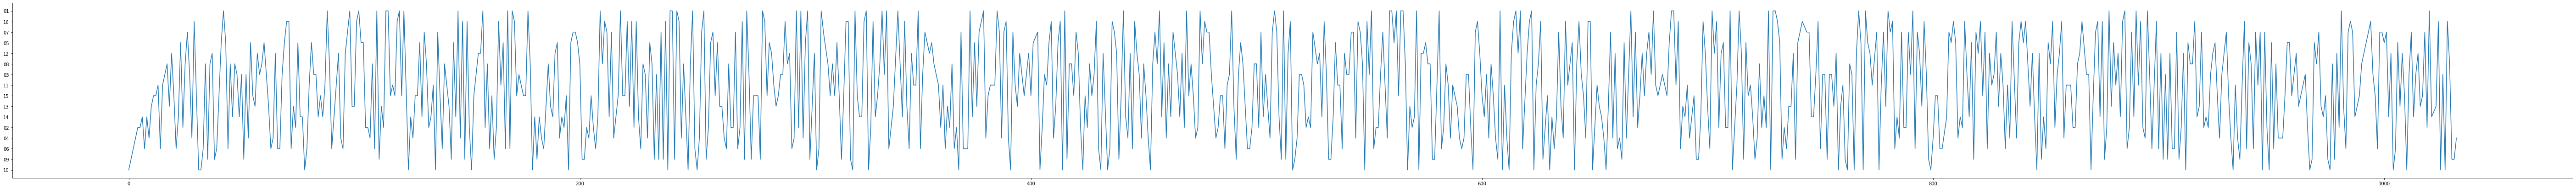

In [30]:
x = data.index
y = data['开奖号码(蓝)']
plt.figure(figsize=(100,7))
plt.plot(x,y)

<BarContainer object of 16 artists>

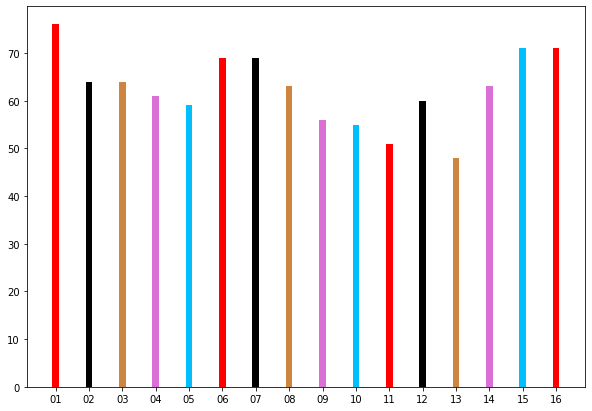

In [7]:
color=['red','black','peru','orchid','deepskyblue']
data_lan = data.groupby('开奖号码(蓝)')['期号'].count()
x = data_lan.index
y = data_lan
plt.figure(figsize=(10,7))
plt.bar(x,y,width=0.2,bottom=None,color=color)

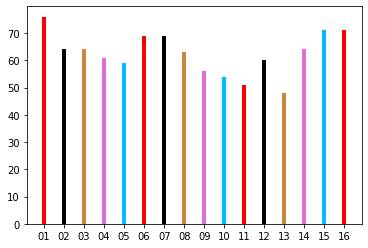

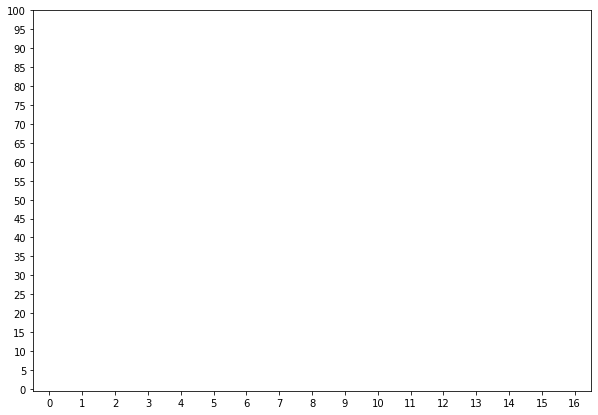

In [26]:
plt.bar(x,y,width=0.2,bottom=None,color=color)
plt.figure(figsize=(10,7))

x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
y_major_locator=MultipleLocator(5)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(-0.5,16.5)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(-0.5,100)
#把y轴的刻度范围设置为-5到110，同理，-5不会标出来，但是能看到一点空白
plt.show()

In [8]:
from pyecharts.charts import *
from sklearn.linear_model import LogisticRegression

In [9]:
data.head()

,期号,开奖日期,开奖号码(红1),开奖号码(红2),开奖号码(红3),开奖号码(红4),开奖号码(红5),开奖号码(红6),开奖号码(蓝),总销售额,奖池
0,2023073,2023-06-27（二）,01,03,15,16,25,32,10,360075550,2285628386
1,2023072,2023-06-25（日）,02,06,10,24,25,33,09,390203400,2257958066
2,2023071,2023-06-22（四）,05,12,15,19,24,26,06,335357710,2261306658
3,2023070,2023-06-20（二）,03,05,25,31,32,33,04,358436376,2298227329
4,2023069,2023-06-18（日）,12,14,17,20,21,26,02,396617204,2216379497


In [43]:
def get_lotto_data(data, lotto, lotto_id):
    # data['lotto_id'] = lotto_id
    X = []
    Y = []
    # 标签and值
    for s, p in zip(data['lotto_id'], data[lotto]):
        X.append([float(s)])
        Y.append(float(p))
        # print([x,y])
    return X, Y

In [23]:
def linear_model_test(X, Y, predict_value):
    regr = LogisticRegression()
    regr.fit(X, Y)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions

In [24]:
def get_predicted_num(file, lotto, lotto_id):
    X, Y = get_lotto_data(file, lotto, lotto_id)
    predict_value = [[100]]
    result = linear_model_test(X, Y, predict_value)
    if lotto_id < 7:
        print(f'中奖第{lotto_id}个红球为：', result['predicted_value'].astype('int64'), '号球')
    else:
        print('中奖蓝球为：', result['predicted_value'].astype('int64'), '号球')

In [44]:
get_predicted_num(data, '开奖号码(红1)', 1)  # 预测红1
get_predicted_num(data, '开奖号码(红2)', 2)  # 预测红2
get_predicted_num(data, '开奖号码(红3)', 3)  # 预测红3
get_predicted_num(data, '开奖号码(红4)', 4)  # 预测红4
get_predicted_num(data, '开奖号码(红5)', 5)  # 预测红5
get_predicted_num(data, '开奖号码(红6)', 6)  # 预测红6
get_predicted_num(data, '开奖号码(蓝)', 7)  # 预测蓝7

中奖第1个红球为： [1] 号球
中奖第2个红球为： [6] 号球
中奖第3个红球为： [15] 号球
中奖第4个红球为： [19] 号球
中奖第5个红球为： [27] 号球
中奖第6个红球为： [33] 号球
中奖蓝球为： [1] 号球
